In [11]:
from statsforecast import StatsForecast
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
itc_df = pd.read_csv("ITC_2024.csv")
itc_test = pd.read_csv("ITC_Test.csv")

In [13]:
itc_df

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
0,2000-04-03,EQ,739.90,800.80,721.05,741.45,792.75,797.00,772.76,1140.8,580.00,1720025,1.329165e+09,NaN
1,2000-04-04,EQ,785.00,785.00,733.25,797.00,733.25,733.25,744.37,1140.8,580.00,581309,4.327067e+08,NaN
2,2000-04-05,EQ,680.00,740.00,675.05,733.25,696.10,698.75,700.53,1140.8,580.00,706269,4.947637e+08,NaN
3,2000-04-06,EQ,705.00,711.00,646.10,698.75,685.00,682.80,676.06,1140.8,580.00,431386,2.916423e+08,NaN
4,2000-04-07,EQ,682.00,733.90,682.00,682.80,730.00,730.95,722.23,1140.8,580.00,1087357,7.853181e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [14]:
# -------------------------------------
# Creating test train validation set 
# -------------------------------------
filter_date = '2022-03-28'

itc_filtered = itc_df[itc_df['date']>=filter_date]

In [15]:
itc_filtered

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
5482,2022-03-28,EQ,254.00,258.00,252.55,253.35,256.20,257.05,255.73,265.3,199.10,24916402,6.371890e+09,156533.0
5483,2022-03-29,EQ,257.05,257.50,253.75,257.05,254.30,254.60,255.06,265.3,199.10,18122714,4.622454e+09,114137.0
5484,2022-03-30,EQ,255.10,256.40,248.65,254.60,249.05,249.20,251.58,265.3,199.10,17603827,4.428750e+09,125981.0
5485,2022-03-31,EQ,249.60,254.35,249.50,249.20,250.70,250.65,251.19,265.3,199.10,25656796,6.444678e+09,131890.0
5486,2022-04-01,EQ,250.00,255.35,248.80,250.65,255.05,253.30,251.32,265.3,199.10,14305709,3.595279e+09,114531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [25]:
itc_train = itc_filtered[itc_filtered['date']<'2024-03-01']
itc_train

itc_train['date'] = pd.to_datetime(itc_train['date'])


C:\Users\user\AppData\Local\Temp\ipykernel_23340\541064952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itc_train['date'] = pd.to_datetime(itc_train['date'])


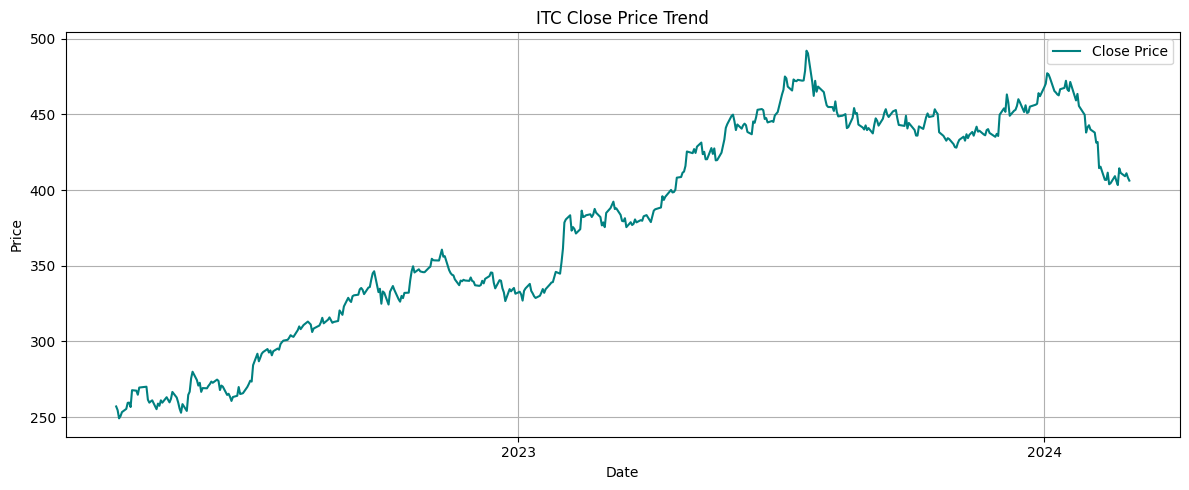

In [26]:
import matplotlib.dates as mdates


# Plot
plt.figure(figsize=(12, 5))
plt.plot(itc_train['date'], itc_train['close'], label=f'{'close'.title()} Price', color='teal')

# Format x-axis to show years only
plt.gca().xaxis.set_major_locator(mdates.YearLocator())           # Tick every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title(f'ITC {'close'.title()} Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()